#Imports

In [ ]:
import pandas as pd

In [ ]:
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
import matplotlib.dates as mdates

In [ ]:
from matplotlib.dates import MO, TU, WE, TH, FR, SA, SU

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

#Reading in data

In [ ]:
df = pd.read_csv("/content/Text&Image_Features_26Sep24_wTime.csv")

In [ ]:
df.columns

Index(['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'id', 'views', 'text',
       'clean_text', 'image_name', 'label_list', 'logos_list', 'face_num',
       'face_emotion', 'face_location', 'face_roll_pan_tilt',
       'image_embedding', 'topic', 'named_entities', 'text_embedding',
       'cosine_similarity', 'percent_face', 'k_means_image_cluster',
       'message_tokens', 'topic_5', 'timestamp'],
      dtype='object')

In [ ]:
df.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,id,views,text,clean_text,image_name,label_list,logos_list,...,image_embedding,topic,named_entities,text_embedding,cosine_similarity,percent_face,k_means_image_cluster,message_tokens,topic_5,timestamp
0,0,0,0,9328,328,"Солдаты в мундирах разных времен, 1912 год.",солдат мундир разный время год,photo_3919@15-02-2022_09-28-20.jpg,"Crew', 'Military person', 'Suit', 'Military un...",NaN,...,"([[-5.3945e-02, 4.8141e-01, -1.5532e-01, 4.4...",6,NaN,"([[[ 1.0899, 0.6695, 0.1660, ..., -0.4907, ...","([[-4.9880e-01, 8.5947e-02, -3.1109e-01, -8.2...","{0: {'face_height': 32, 'face_width': 28, 'fac...",8,"['солдат', 'мундир', 'разный', 'время', 'год']",3.0,2022-02-15 14:28:20
1,1,1,1,9329,328,В Украине ввели уголовную ответственность за а...,украина вводить уголовный ответственность анти...,photo_3920@15-02-2022_09-32-43.jpg,"Table', 'Furniture', 'Chair', 'Cabinetry', 'Su...",NaN,...,"([[ 2.9389e-01, -3.0918e-01, 2.4409e-01, 4.4...",6,"украина,","([[[ 1.0899, 0.6695, 0.1660, ..., -0.4907, ...","([[ 1.0315e-02, -2.7515e-01, 3.2369e-02, 7.7...","{0: {'face_height': 24, 'face_width': 21, 'fac...",8,"['украина', 'вводить', 'уголовный', 'ответстве...",4.0,2022-02-15 14:32:43
2,2,2,2,9330,335,"☦️🇷🇺О НАСТОЯЩЕЙ ЛЮБВИ в день ""влюбленных"".\n\n...",настоящий любовь день влюбленный февраль год р...,photo_3921@15-02-2022_12-59-58.jpg,"Forehead', 'Eyebrow', 'Beard', 'Facial hair', ...",NaN,...,"([[-0.4646, 0.5783, 0.4078, -0.2127, -0.1296...",8,"анатолий чистоусов, анатолий, грозный, анатоли...","([[[ 1.0899, 0.6695, 0.1660, ..., -0.4907, ...","([[-3.1335e-01, 7.0742e-02, 9.5767e-03, -1.7...","{0: {'face_height': 249, 'face_width': 229, 'f...",8,"['настоящий', 'любовь', 'день', 'влюбленный', ...",3.0,2022-02-15 17:59:58
3,3,3,3,9334,345,"Люди,которые поддерживают марксизм / Лидеры ма...",человек который поддерживать марксизм лидер ма...,photo_3922@17-02-2022_12-33-57.jpg,"Water resources', 'Ecoregion', 'Natural enviro...",NaN,...,"([[-1.8600e-01, 4.2391e-01, -2.4769e-01, 1.8...",1,NaN,"([[[ 1.0899, 0.6695, 0.1660, ..., -0.4907, ...","([[-2.6191e-01, 7.0323e-01, -1.4242e-01, 4.0...",{'total_face_percent': 0},5,"['человек', 'который', 'поддерживать', 'маркси...",2.0,2022-02-17 17:33:57
4,4,4,4,9337,327,Рекомендации по снятию золотых зубных протезов...,рекомендация снятие золотой зубной протез умир...,photo_3923@18-02-2022_20-08-32.jpg,"Handwriting', 'Signature', 'Font', 'Writing', ...",NaN,...,"([[-3.7463e-01, 8.6842e-01, 1.3163e-01, 1.6...",6,"аушвиц,","([[[ 1.0899, 0.6695, 0.1660, ..., -0.4907, ...","([[-2.8352e-01, 1.6074e-01, -1.1193e-01, -2.4...",{'total_face_percent': 0},5,"['рекомендация', 'снятие', 'золотой', 'зубной'...",1.0,2022-02-19 1:08:32


#Filtering
In order to run the analysis with text topic and image cluster, I can only use records with both of those values. Filtering out messages that do not have a topic.

In [ ]:
#Code from https://saturncloud.io/blog/how-to-delete-rows-with-null-values-in-a-specific-column-in-pandas-dataframe/#:~:text=Deleting%20rows%20with%20null%20values%20in%20a%20specific%20column%20can,values%20in%20the%20specified%20column.&text=df%20is%20the%20Pandas%20DataFrame%20that%20you%20want%20to%20modify.
df_lim = df.dropna(subset=['topic_5'], inplace=False)

In [ ]:
len(df_lim)

31

In [ ]:
df_lim

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,id,views,text,clean_text,image_name,label_list,logos_list,...,image_embedding,topic,named_entities,text_embedding,cosine_similarity,percent_face,k_means_image_cluster,message_tokens,topic_5,timestamp
0,0,0,0,9328,328,"Солдаты в мундирах разных времен, 1912 год.",солдат мундир разный время год,photo_3919@15-02-2022_09-28-20.jpg,"Crew', 'Military person', 'Suit', 'Military un...",NaN,...,"([[-5.3945e-02, 4.8141e-01, -1.5532e-01, 4.4...",6,NaN,"([[[ 1.0899, 0.6695, 0.1660, ..., -0.4907, ...","([[-4.9880e-01, 8.5947e-02, -3.1109e-01, -8.2...","{0: {'face_height': 32, 'face_width': 28, 'fac...",8,"['солдат', 'мундир', 'разный', 'время', 'год']",3.0,2022-02-15 14:28:20
1,1,1,1,9329,328,В Украине ввели уголовную ответственность за а...,украина вводить уголовный ответственность анти...,photo_3920@15-02-2022_09-32-43.jpg,"Table', 'Furniture', 'Chair', 'Cabinetry', 'Su...",NaN,...,"([[ 2.9389e-01, -3.0918e-01, 2.4409e-01, 4.4...",6,"украина,","([[[ 1.0899, 0.6695, 0.1660, ..., -0.4907, ...","([[ 1.0315e-02, -2.7515e-01, 3.2369e-02, 7.7...","{0: {'face_height': 24, 'face_width': 21, 'fac...",8,"['украина', 'вводить', 'уголовный', 'ответстве...",4.0,2022-02-15 14:32:43
2,2,2,2,9330,335,"☦️🇷🇺О НАСТОЯЩЕЙ ЛЮБВИ в день ""влюбленных"".\n\n...",настоящий любовь день влюбленный февраль год р...,photo_3921@15-02-2022_12-59-58.jpg,"Forehead', 'Eyebrow', 'Beard', 'Facial hair', ...",NaN,...,"([[-0.4646, 0.5783, 0.4078, -0.2127, -0.1296...",8,"анатолий чистоусов, анатолий, грозный, анатоли...","([[[ 1.0899, 0.6695, 0.1660, ..., -0.4907, ...","([[-3.1335e-01, 7.0742e-02, 9.5767e-03, -1.7...","{0: {'face_height': 249, 'face_width': 229, 'f...",8,"['настоящий', 'любовь', 'день', 'влюбленный', ...",3.0,2022-02-15 17:59:58
3,3,3,3,9334,345,"Люди,которые поддерживают марксизм / Лидеры ма...",человек который поддерживать марксизм лидер ма...,photo_3922@17-02-2022_12-33-57.jpg,"Water resources', 'Ecoregion', 'Natural enviro...",NaN,...,"([[-1.8600e-01, 4.2391e-01, -2.4769e-01, 1.8...",1,NaN,"([[[ 1.0899, 0.6695, 0.1660, ..., -0.4907, ...","([[-2.6191e-01, 7.0323e-01, -1.4242e-01, 4.0...",{'total_face_percent': 0},5,"['человек', 'который', 'поддерживать', 'маркси...",2.0,2022-02-17 17:33:57
4,4,4,4,9337,327,Рекомендации по снятию золотых зубных протезов...,рекомендация снятие золотой зубной протез умир...,photo_3923@18-02-2022_20-08-32.jpg,"Handwriting', 'Signature', 'Font', 'Writing', ...",NaN,...,"([[-3.7463e-01, 8.6842e-01, 1.3163e-01, 1.6...",6,"аушвиц,","([[[ 1.0899, 0.6695, 0.1660, ..., -0.4907, ...","([[-2.8352e-01, 1.6074e-01, -1.1193e-01, -2.4...",{'total_face_percent': 0},5,"['рекомендация', 'снятие', 'золотой', 'зубной'...",1.0,2022-02-19 1:08:32
5,5,5,5,9338,332,❗️В ДНР мобилизация.,в днр мобилизация,photo_3924@19-02-2022_02-13-56.jpg,"Font', 'Parallel', 'Signature', 'Paper', 'Pape...","""Donetsk People's Republic"", ""Donetsk People's...",...,"([[-2.5625e-01, -2.3072e-01, 5.8106e-01, 5.7...",4,"днр,","([[[ 1.0899e+00, 6.6951e-01, 1.6602e-01, .....","([[-7.4442e-01, -6.8683e-01, 3.9966e-01, -4.6...",{'total_face_percent': 0},5,"['днр', 'мобилизация']",3.0,2022-02-19 7:13:56
6,6,6,6,9340,314,['В начале января этого года испанские исследо...,[' начало январь год испанский исследователь п...,photo_3925@19-02-2022_08-12-21.jpg,"Product', 'Azure', 'Rectangle', 'Blue', 'Fluid...",NaN,...,"([[-4.1725e-01, 5.7461e-03, -1.2092e-01, -1.9...",6,"telegram, orwell city n, аргентина, \ n ', ' t...","([[[ 1.0899, 0.6695, 0.1660, ..., -0.4907, ...","([[-0.3554, -0.0687, -0.0631, -0.1966, -0.0675...",{'total_face_percent': 0},8,"['начало', 'январь', 'год', 'испанский', 'иссл...",0.0,2022-02-19 13:12:21
7,7,7,7,9346,426,Перед вступлением на царский престол Николая I...,вступление царский престол николай ii населени...,photo_3926@21-02-2022_04-30-41.jpg,"Sky', 'Cloud', 'Building', 'Working animal', '...",NaN,...,"([[-0.6865, -0.1859, -0.5622, 0.5621, -0.4841...",3,"николай ii, николай ii, россия, европа","([[[ 1.0899, 0.6695, 0

In [ ]:
#checking that the topic counts are still the same
#code from Google AI overview
df_lim['topic_5'].value_counts()

,count
topic_5,
0.0,8
3.0,7
4.0,7
2.0,6
1.0,3


#Regression
Running a mixed effects regression model

Assessing independence

<Figure size 1000x500 with 0 Axes>

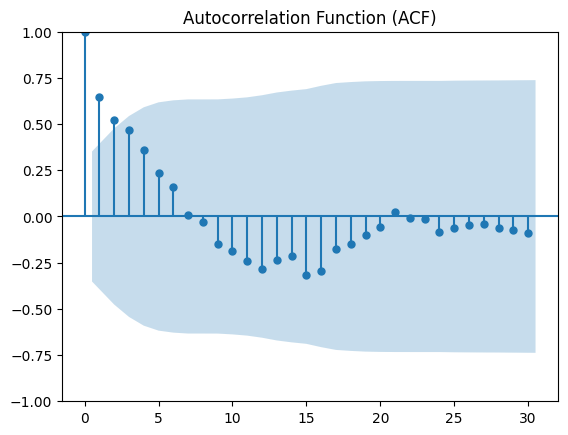

In [ ]:
#Since the views increase significantly over time I suspect they might not be independent
#Using the Autocorrelation Function (ACF) to check that
#From ChatGPT

plt.figure(figsize=(10, 5))
plot_acf(df_lim['views'], lags=30)
plt.title('Autocorrelation Function (ACF)')
plt.show()

These results show that the autocorrelation is significant at lags 1 and 2. Therefore, the data points are likely not independent.

### Mixed Effects Model

---



As far as I can tell, my data is time series data and exhibits autocorrelation at lags 1 and 2 based on the results from the plot_acf() function. According to wikipedia, mixed models "are particularly useful in settings where repeated measurements are made on the same statistical units (see also longitudinal study), or where measurements are made on **clusters of related statistical units**.[2] Mixed models are often preferred over traditional analysis of variance regression models because they **don't rely on the independent observations assumption**. Further, they have their flexibility in dealing with missing values and uneven spacing of repeated measurements.[3] The Mixed model analysis allows measurements to be explicitly modeled in a wider variety of correlation and variance-covariance avoiding biased estimations. structures" emphasis added (https://en.wikipedia.org/wiki/Mixed_model). I think that my messages are clusters of related statistical units and they are not independent of one another. Therefore, I am going to try using a mixed-effects model.

https://www.st-andrews.ac.uk/media/ceed/students/mathssupport/mixedeffectsknir.pdf

Assumptions of a linear mixed effect model:

"The assumptions, for a linear mixed effects model,

• The explanatory variables are related linearly to the response. - [not sure?]

• The errors have constant variance. - [no]

• The errors are independent. - [no since there is autocorrelation]

• The errors are Normally distributed." - [no]

I'm not sure if these tests work, since some of them might rely on regressions themselves? Going ahead and trying the mixed effects model. Will include potential assumption breaking in the limitations section.

In [ ]:
#adding date back as a column so it can be made into a number
#https://saturncloud.io/blog/fastest-way-to-copy-columns-from-one-dataframe-to-another-using-pandas/#:~:text=There%20are%20several%20ways%20to,and%20columns%20in%20a%20DataFrame.
df_lim['date'] = pd.to_datetime(df_lim['timestamp']).dt.date

In [ ]:
#converting date to a number (from ChatGPT and https://www.tutorialspoint.com/how-to-convert-datetime-to-an-integer-in-python#:~:text=An%20alternative%20method%20for%20converting,using%20the%20int()%20function.)
df_lim['date_num'] = df_lim['date'].apply(lambda x: x.toordinal())
df_lim.head()
#"The toordinal() method of the DateTime object returns the proleptic Gregorian ordinal of a date. This value represents the number of days since January 1, 1 AD. This value can be converted to an integer." (https://www.tutorialspoint.com/how-to-convert-datetime-to-an-integer-in-python#:~:text=An%20alternative%20method%20for%20converting,using%20the%20int()%20function.)

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,id,views,text,clean_text,image_name,label_list,logos_list,...,named_entities,text_embedding,cosine_similarity,percent_face,k_means_image_cluster,message_tokens,topic_5,timestamp,date,date_num
0,0,0,0,9328,328,"Солдаты в мундирах разных времен, 1912 год.",солдат мундир разный время год,photo_3919@15-02-2022_09-28-20.jpg,"Crew', 'Military person', 'Suit', 'Military un...",NaN,...,NaN,"([[[ 1.0899, 0.6695, 0.1660, ..., -0.4907, ...","([[-4.9880e-01, 8.5947e-02, -3.1109e-01, -8.2...","{0: {'face_height': 32, 'face_width': 28, 'fac...",8,"['солдат', 'мундир', 'разный', 'время', 'год']",3.0,2022-02-15 14:28:20,2022-02-15,738201
1,1,1,1,9329,328,В Украине ввели уголовную ответственность за а...,украина вводить уголовный ответственность анти...,photo_3920@15-02-2022_09-32-43.jpg,"Table', 'Furniture', 'Chair', 'Cabinetry', 'Su...",NaN,...,"украина,","([[[ 1.0899, 0.6695, 0.1660, ..., -0.4907, ...","([[ 1.0315e-02, -2.7515e-01, 3.2369e-02, 7.7...","{0: {'face_height': 24, 'face_width': 21, 'fac...",8,"['украина', 'вводить', 'уголовный', 'ответстве...",4.0,2022-02-15 14:32:43,2022-02-15,738201
2,2,2,2,9330,335,"☦️🇷🇺О НАСТОЯЩЕЙ ЛЮБВИ в день ""влюбленных"".\n\n...",настоящий любовь день влюбленный февраль год р...,photo_3921@15-02-2022_12-59-58.jpg,"Forehead', 'Eyebrow', 'Beard', 'Facial hair', ...",NaN,...,"анатолий чистоусов, анатолий, грозный, анатоли...","([[[ 1.0899, 0.6695, 0.1660, ..., -0.4907, ...","([[-3.1335e-01, 7.0742e-02, 9.5767e-03, -1.7...","{0: {'face_height': 249, 'face_width': 229, 'f...",8,"['настоящий', 'любовь', 'день', 'влюбленный', ...",3.0,2022-02-15 17:59:58,2022-02-15,738201
3,3,3,3,9334,345,"Люди,которые поддерживают марксизм / Лидеры ма...",человек который поддерживать марксизм лидер ма...,photo_3922@17-02-2022_12-33-57.jpg,"Water resources', 'Ecoregion', 'Natural enviro...",NaN,...,NaN,"([[[ 1.0899, 0.6695, 0.1660, ..., -0.4907, ...","([[-2.6191e-01, 7.0323e-01, -1.4242e-01, 4.0...",{'total_face_percent': 0},5,"['человек', 'который', 'поддерживать', 'маркси...",2.0,2022-02-17 17:33:57,2022-02-17,738203
4,4,4,4,9337,327,Рекомендации по снятию золотых зубных протезов...,рекомендация снятие золотой зубной протез умир...,photo_3923@18-02-2022_20-08-32.jpg,"Handwriting', 'Signature', 'Font', 'Writing', ...",NaN,...,"аушвиц,","([[[ 1.0899, 0.6695, 0.1660, ..., -0.4907, ...","([[-2.8352e-01, 1.6074e-01, -1.1193e-01, -2.4...",{'total_face_percent': 0},5,"['рекомендация', 'снятие', 'золотой', 'зубной'...",1.0,2022-02-19 1:08:32,2022-02-19,738205


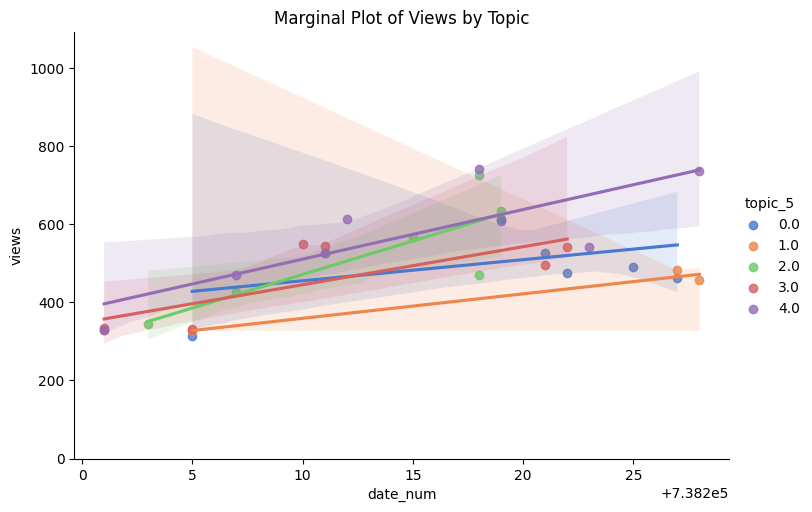

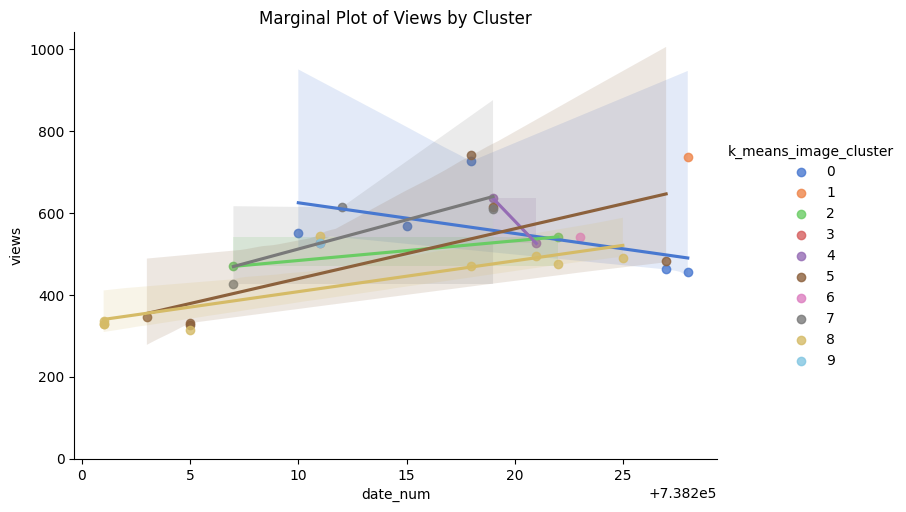

In [ ]:
#The explanatory variables are related linearly to the response.  - not sure?

#Marginal Plot - From ChatGPT

import seaborn as sns

# Marginal plot
sns.lmplot(x='date_num', y='views', hue='topic_5', data=df_lim, aspect=1.5, ci=95, palette='muted')
plt.ylim(bottom=0)
plt.title('Marginal Plot of Views by Topic')
plt.show()

sns.lmplot(x='date_num', y='views', hue='k_means_image_cluster', data=df_lim, aspect=1.5, ci=95, palette='muted')
plt.ylim(bottom=0)
plt.title('Marginal Plot of Views by Cluster')
plt.show()

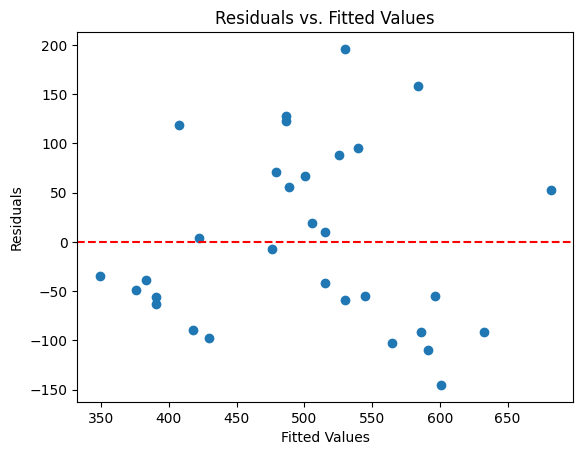

In [ ]:
#• The errors have constant variance.  - this does have a pattern, therefore there is not constant variance
# Residuals vs. Fitted Values Plot - chatGPT


# Fit a regression model
model = sm.OLS(df_lim['views'], sm.add_constant(df_lim[['date_num', 'topic_5']])).fit()

# Get the fitted values and residuals
fitted_values = model.fittedvalues
residuals = model.resid

# Create a residuals vs. fitted values plot
plt.scatter(fitted_values, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.show()


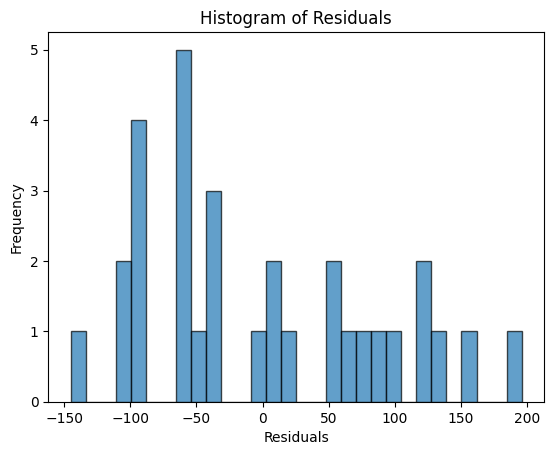

In [ ]:
#errors are not normally distributed

model = sm.OLS(df_lim['views'], sm.add_constant(df_lim[['date_num', 'topic_5']])).fit()

# Histogram of Residuals
plt.hist(model.resid, bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

#### Running the mixed effects model

Using every five days as a group. I originally tried using each day as a group, but the number of values in each group is too small, which I think might have caused the singular matrix error

In [ ]:
df_lim.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,id,views,text,clean_text,image_name,label_list,logos_list,...,named_entities,text_embedding,cosine_similarity,percent_face,k_means_image_cluster,message_tokens,topic_5,timestamp,date,date_num
0,0,0,0,9328,328,"Солдаты в мундирах разных времен, 1912 год.",солдат мундир разный время год,photo_3919@15-02-2022_09-28-20.jpg,"Crew', 'Military person', 'Suit', 'Military un...",NaN,...,NaN,"([[[ 1.0899, 0.6695, 0.1660, ..., -0.4907, ...","([[-4.9880e-01, 8.5947e-02, -3.1109e-01, -8.2...","{0: {'face_height': 32, 'face_width': 28, 'fac...",8,"['солдат', 'мундир', 'разный', 'время', 'год']",3.0,2022-02-15 14:28:20,2022-02-15,738201
1,1,1,1,9329,328,В Украине ввели уголовную ответственность за а...,украина вводить уголовный ответственность анти...,photo_3920@15-02-2022_09-32-43.jpg,"Table', 'Furniture', 'Chair', 'Cabinetry', 'Su...",NaN,...,"украина,","([[[ 1.0899, 0.6695, 0.1660, ..., -0.4907, ...","([[ 1.0315e-02, -2.7515e-01, 3.2369e-02, 7.7...","{0: {'face_height': 24, 'face_width': 21, 'fac...",8,"['украина', 'вводить', 'уголовный', 'ответстве...",4.0,2022-02-15 14:32:43,2022-02-15,738201
2,2,2,2,9330,335,"☦️🇷🇺О НАСТОЯЩЕЙ ЛЮБВИ в день ""влюбленных"".\n\n...",настоящий любовь день влюбленный февраль год р...,photo_3921@15-02-2022_12-59-58.jpg,"Forehead', 'Eyebrow', 'Beard', 'Facial hair', ...",NaN,...,"анатолий чистоусов, анатолий, грозный, анатоли...","([[[ 1.0899, 0.6695, 0.1660, ..., -0.4907, ...","([[-3.1335e-01, 7.0742e-02, 9.5767e-03, -1.7...","{0: {'face_height': 249, 'face_width': 229, 'f...",8,"['настоящий', 'любовь', 'день', 'влюбленный', ...",3.0,2022-02-15 17:59:58,2022-02-15,738201
3,3,3,3,9334,345,"Люди,которые поддерживают марксизм / Лидеры ма...",человек который поддерживать марксизм лидер ма...,photo_3922@17-02-2022_12-33-57.jpg,"Water resources', 'Ecoregion', 'Natural enviro...",NaN,...,NaN,"([[[ 1.0899, 0.6695, 0.1660, ..., -0.4907, ...","([[-2.6191e-01, 7.0323e-01, -1.4242e-01, 4.0...",{'total_face_percent': 0},5,"['человек', 'который', 'поддерживать', 'маркси...",2.0,2022-02-17 17:33:57,2022-02-17,738203
4,4,4,4,9337,327,Рекомендации по снятию золотых зубных протезов...,рекомендация снятие золотой зубной протез умир...,photo_3923@18-02-2022_20-08-32.jpg,"Handwriting', 'Signature', 'Font', 'Writing', ...",NaN,...,"аушвиц,","([[[ 1.0899, 0.6695, 0.1660, ..., -0.4907, ...","([[-2.8352e-01, 1.6074e-01, -1.1193e-01, -2.4...",{'total_face_percent': 0},5,"['рекомендация', 'снятие', 'золотой', 'зубной'...",1.0,2022-02-19 1:08:32,2022-02-19,738205


In [ ]:
df_lim.groupby("date").count()
#there are 17 days on which messages were sent in the dataset

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,id,views,text,clean_text,image_name,label_list,logos_list,...,topic,named_entities,text_embedding,cosine_similarity,percent_face,k_means_image_cluster,message_tokens,topic_5,timestamp,date_num
date,,,,,,,,,,,,,,,,,,,,,
2022-02-15,3,3,3,3,3,3,3,3,3,0,...,3,2,3,3,3,3,3,3,3,3
2022-02-17,1,1,1,1,1,1,1,1,1,0,...,1,0,1,1,1,1,1,1,1,1
2022-02-19,3,3,3,3,3,3,3,3,3,1,...,3,3,3,3,3,3,3,3,3,3
2022-02-21,2,2,2,2,2,2,2,2,2,0,...,2,2,2,2,2,2,2,2,2,2
2022-02-24,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2022-02-25,3,3,3,3,3,3,3,3,3,0,...,3,3,3,3,3,3,3,3,3,3
2022-02-26,1,1,1,1,1,1,1,1,1,0,...,1,1,1,1,1,1,1,1,1,1
2022-03-01,1,1,1,1,1,1,1,1,1,0,...,1,1,1,1,1,1,1,1,1,1
2022-03-04,3,3,3,3,3,3,3,3,3,1,...,3,3,3,3,3,3,3,3,3,3


In [ ]:
#grouping them into five day increments to create 5 groups
#need at least 5 levels for the model https://pubmed.ncbi.nlm.nih.gov/35116198/#:~:text=As%20linear%20mixed%2Deffects%20models,associated%20with%20a%20random%20effect.

df_lim['group'] = ''

df_lim.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,id,views,text,clean_text,image_name,label_list,logos_list,...,text_embedding,cosine_similarity,percent_face,k_means_image_cluster,message_tokens,topic_5,timestamp,date,date_num,group
0,0,0,0,9328,328,"Солдаты в мундирах разных времен, 1912 год.",солдат мундир разный время год,photo_3919@15-02-2022_09-28-20.jpg,"Crew', 'Military person', 'Suit', 'Military un...",NaN,...,"([[[ 1.0899, 0.6695, 0.1660, ..., -0.4907, ...","([[-4.9880e-01, 8.5947e-02, -3.1109e-01, -8.2...","{0: {'face_height': 32, 'face_width': 28, 'fac...",8,"['солдат', 'мундир', 'разный', 'время', 'год']",3.0,2022-02-15 14:28:20,2022-02-15,738201,
1,1,1,1,9329,328,В Украине ввели уголовную ответственность за а...,украина вводить уголовный ответственность анти...,photo_3920@15-02-2022_09-32-43.jpg,"Table', 'Furniture', 'Chair', 'Cabinetry', 'Su...",NaN,...,"([[[ 1.0899, 0.6695, 0.1660, ..., -0.4907, ...","([[ 1.0315e-02, -2.7515e-01, 3.2369e-02, 7.7...","{0: {'face_height': 24, 'face_width': 21, 'fac...",8,"['украина', 'вводить', 'уголовный', 'ответстве...",4.0,2022-02-15 14:32:43,2022-02-15,738201,
2,2,2,2,9330,335,"☦️🇷🇺О НАСТОЯЩЕЙ ЛЮБВИ в день ""влюбленных"".\n\n...",настоящий любовь день влюбленный февраль год р...,photo_3921@15-02-2022_12-59-58.jpg,"Forehead', 'Eyebrow', 'Beard', 'Facial hair', ...",NaN,...,"([[[ 1.0899, 0.6695, 0.1660, ..., -0.4907, ...","([[-3.1335e-01, 7.0742e-02, 9.5767e-03, -1.7...","{0: {'face_height': 249, 'face_width': 229, 'f...",8,"['настоящий', 'любовь', 'день', 'влюбленный', ...",3.0,2022-02-15 17:59:58,2022-02-15,738201,
3,3,3,3,9334,345,"Люди,которые поддерживают марксизм / Лидеры ма...",человек который поддерживать марксизм лидер ма...,photo_3922@17-02-2022_12-33-57.jpg,"Water resources', 'Ecoregion', 'Natural enviro...",NaN,...,"([[[ 1.0899, 0.6695, 0.1660, ..., -0.4907, ...","([[-2.6191e-01, 7.0323e-01, -1.4242e-01, 4.0...",{'total_face_percent': 0},5,"['человек', 'который', 'поддерживать', 'маркси...",2.0,2022-02-17 17:33:57,2022-02-17,738203,
4,4,4,4,9337,327,Рекомендации по снятию золотых зубных протезов...,рекомендация снятие золотой зубной протез умир...,photo_3923@18-02-2022_20-08-32.jpg,"Handwriting', 'Signature', 'Font', 'Writing', ...",NaN,...,"([[[ 1.0899, 0.6695, 0.1660, ..., -0.4907, ...","([[-2.8352e-01, 1.6074e-01, -1.1193e-01, -2.4...",{'total_face_percent': 0},5,"['рекомендация', 'снятие', 'золотой', 'зубной'...",1.0,2022-02-19 1:08:32,2022-02-19,738205,


In [ ]:
#helped by Google AI
for index in df_lim.index:
  if df_lim.loc[index, 'date_num'] >= 738201 and df_lim.loc[index, 'date_num'] < 738206:
    df_lim.loc[index, 'group'] = 0
  if df_lim.loc[index, 'date_num'] >= 738206 and df_lim.loc[index, 'date_num'] < 738210:
    df_lim.loc[index, 'group'] = 1
  if df_lim.loc[index, 'date_num'] >= 738210 and df_lim.loc[index, 'date_num'] < 738215:
    df_lim.loc[index, 'group'] = 2
  if df_lim.loc[index, 'date_num'] >= 738215 and df_lim.loc[index, 'date_num'] < 738220:
    df_lim.loc[index, 'group'] = 3
  if df_lim.loc[index, 'date_num'] >= 738220 and df_lim.loc[index, 'date_num'] < 738225:
    df_lim.loc[index, 'group'] = 4
  if df_lim.loc[index, 'date_num'] >= 738225 and df_lim.loc[index, 'date_num'] < 738230:
    df_lim.loc[index, 'group'] = 5

In [ ]:
df_lim.tail()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,id,views,text,clean_text,image_name,label_list,logos_list,...,text_embedding,cosine_similarity,percent_face,k_means_image_cluster,message_tokens,topic_5,timestamp,date,date_num,group
47,47,47,47,9432,490,Летчики 20-го корпусного отряда. Слева направо...,летчик го корпусный отряд слева направо прапор...,photo_3966@11-03-2022_15-23-10.jpg,"Squad', 'Military person', 'Helmet', 'Military...",NaN,...,"([[[ 1.0899, 0.6695, 0.1660, ..., -0.4907, ...","([[ 2.9483e-02, 4.9681e-01, 2.1873e-01, -2.1...","{0: {'face_height': 55, 'face_width': 47, 'fac...",8,"['летчик', 'го', 'корпусный', 'отряд', 'слева'...",0.0,2022-03-11 20:23:10,2022-03-11,738225,5
49,49,49,49,9436,462,🇮🇩🇺🇦 У Пољској су се појавили леци који подсећ...,пољској су се појавили леци који подсећају зло...,photo_3968@13-03-2022_15-14-27.jpg,"Font', 'Traffic light', 'Wall', 'Public space'...",NaN,...,"([[[ 1.0899, 0.6695, 0.1660, ..., -0.4907, ...","([[ 9.3743e-02, 5.2219e-01, 5.7020e-02, -1.6...",{'total_face_percent': 0},0,"['пољској', 'су', 'се', 'појавили', 'леци', 'к...",0.0,2022-03-13 19:14:27,2022-03-13,738227,5
51,51,51,51,9438,482,Володин отменил Ковид в Госдуме. Вот так вот. ...,володин отменять ковид госдума просто бесславн...,photo_3970@13-03-2022_17-48-14.jpg,"Font', 'Parallel', 'Circle', 'Paper', 'Documen...",NaN,...,"([[[ 1.0899, 0.6695, 0.1660, ..., -0.4907, ...","([[-7.1064e-02, 2.4244e-01, 2.8849e-01, 4.2...",{'total_face_percent': 0},5,"['володин', 'отменять', 'ковид', 'госдума', 'п...",1.0,2022-03-13 21:48:14,2022-03-13,738227,5
52,52,52,52,9440,456,"['Пожалуй, лучшая фотография с сегодняшнего ав...",[' пожалуй хороший фотография сегодняшний авто...,photo_3971@14-03-2022_01-51-10.jpg,"Tire', 'Wheel', 'Automotive lighting', 'Motor ...","Flag of Russia', 'Flag of Serbia'",...,"([[[ 1.0899, 0.6695, 0.1660, ..., -0.4907, ...","([[ 1.9737e-01, 4.6335e-02, 3.6169e-02, 2.8...","{0: {'face_height': 129, 'face_width': 111, 'f...",0,"['пожалуй', 'хороший', 'фотография', 'сегодняш...",1.0,2022-03-14 5:51:10,2022-03-14,738228,5
53,53,53,53,9442,735,Высадка российского десанта ВДВ в Гостомеле. К...,высадка российский десант вдв гостомель китайс...,photo_3972@14-03-2022_17-06-18.jpg,"Wheel', 'Tire', 'Vehicle', 'Sky', 'Military he...",NaN,...,"([[[ 1.0899, 0.6695, 0.1660, ..., -0.4907, ...","([[ 1.4051e-02, -3.1070e-01, -4.0135e-01, 7.1...",{'total_face_percent': 0},1,"['высадка', 'российский', 'десант', 'вдв', 'го...",4.0,2022-03-14 21:06:18,2022-03-14,738228,5


In [ ]:
#running the model from Chat GPT


# Fit a mixed-effects model
mixed_model = smf.mixedlm("views ~ C(topic_5) + C(k_means_image_cluster	)", df_lim, groups=df_lim["group"]).fit()

# Print summary
print(mixed_model.summary())

                    Mixed Linear Model Regression Results
Model:                    MixedLM        Dependent Variable:        views    
No. Observations:         31             Method:                    REML     
No. Groups:               6              Scale:                     2769.0300
Min. group size:          2              Log-Likelihood:            -103.2094
Max. group size:          7              Converged:                 Yes      
Mean group size:          5.2                                                
-----------------------------------------------------------------------------
                               Coef.   Std.Err.   z    P>|z|  [0.025   0.975]
-----------------------------------------------------------------------------
Intercept                      497.732   54.381  9.153 0.000  391.148 604.316
C(topic_5)[T.1.0]              -32.903   44.160 -0.745 0.456 -119.455  53.649
C(topic_5)[T.2.0]               -9.280   35.918 -0.258 0.796  -79.678  61.118
C(topi